In [1]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split

from feature_engine.encoding import CountFrequencyEncoder

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [ ]:
##Importing the data

In [2]:
df=pd.read_csv('houseprice.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [65]:
####we will use few selected columns 
usecols=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'LotShape','Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

In [6]:
###keeping backup of the original data
df_orig=df.copy()

In [7]:
df=df[usecols]

In [8]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,60,RL,65.0,8450,Pave,Reg,CollgCr,VinylSd,VinylSd,208500
1,20,RL,80.0,9600,Pave,Reg,Veenker,MetalSd,MetalSd,181500
2,60,RL,68.0,11250,Pave,IR1,CollgCr,VinylSd,VinylSd,223500
3,70,RL,60.0,9550,Pave,IR1,Crawfor,Wd Sdng,Wd Shng,140000
4,60,RL,84.0,14260,Pave,IR1,NoRidge,VinylSd,VinylSd,250000


In [ ]:
###Checking categorical and numerical variables

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Street        1460 non-null   object 
 5   LotShape      1460 non-null   object 
 6   Neighborhood  1460 non-null   object 
 7   Exterior1st   1460 non-null   object 
 8   Exterior2nd   1460 non-null   object 
 9   SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 114.2+ KB


In [10]:
####Checking missing values
df.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
LotShape          0
Neighborhood      0
Exterior1st       0
Exterior2nd       0
SalePrice         0
dtype: int64

In [11]:
df.shape

(1460, 10)

In [ ]:
###Replacing missing values with mean of the variable

In [12]:

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [13]:
df.isnull().sum()

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
Neighborhood    0
Exterior1st     0
Exterior2nd     0
SalePrice       0
dtype: int64

In [14]:
##Train test split

from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('SalePrice',axis=1),  # predictors
    df['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [16]:
###One hot encoding using feature engine
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder

In [17]:
ohe_enc = fe_OneHotEncoder(
    top_categories=None,
     variables=['MSZoning','Street','LotShape','Neighborhood', 'Exterior1st', 'Exterior2nd'],# we can select which variables to encode
    drop_last=True)  # to return k-1, false to return k


X_train_ohe=ohe_enc.fit_transform(X_train)

In [18]:
X_test_ohe=ohe_enc.transform(X_test)

In [19]:
X_train_ohe.shape,X_test_ohe.shape

((1022, 64), (438, 64))

In [20]:
X_train_ohe.head()

,MSSubClass,LotFrontage,LotArea,MSZoning_RL,MSZoning_RM,MSZoning_FV,MSZoning_C (all),Street_Pave,LotShape_Reg,LotShape_IR1,...,Exterior2nd_MetalSd,Exterior2nd_AsphShn,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_ImStucc,Exterior2nd_Stone,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_CBlock
64,60,70.049958,9375,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
682,120,70.049958,2887,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
960,20,50.000000,7207,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1384,50,60.000000,9060,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1100,30,60.000000,8400,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_test_ohe.head()

,MSSubClass,LotFrontage,LotArea,MSZoning_RL,MSZoning_RM,MSZoning_FV,MSZoning_C (all),Street_Pave,LotShape_Reg,LotShape_IR1,...,Exterior2nd_MetalSd,Exterior2nd_AsphShn,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_ImStucc,Exterior2nd_Stone,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_CBlock
529,20,70.049958,32668,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
491,50,79.000000,9490,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
459,50,70.049958,7015,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
279,60,83.000000,10005,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
655,160,21.000000,1680,0,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
####Standardising the data

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:



scaler = StandardScaler()


scaler.fit(X_train_ohe)

# transform train and test sets
X_train_ohe= scaler.transform(X_train_ohe)
X_test_ohe = scaler.transform(X_test_ohe)

In [24]:
###Linear Regression model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train_ohe,y_train)

LinearRegression()

In [28]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-2.02327800e+03  1.30540722e+04  1.05059173e+04  1.32054103e+04
  1.34966275e+04  2.84944217e+03 -4.24827052e+01  3.14897315e+03
  3.34960917e+03  8.00806600e+03  4.54864897e+03  2.55160322e+03
  5.26905201e+02 -8.98300111e+03 -1.29486999e+04 -2.54934842e+03
 -1.10443326e+04  4.79017766e+03 -1.40073359e+04 -5.89917216e+03
  3.82805475e+03 -1.97132691e+03  1.15524228e+04 -1.14133391e+04
 -1.18630516e+04 -4.83842551e+03 -3.32997875e+02  2.36655882e+04
  5.82897814e+00  2.28292125e+04 -9.83359965e+03 -3.07318347e+03
  1.31847353e+04  3.21006354e+03  2.70207419e+03 -3.65935911e+04
 -2.34159980e+04 -8.61781487e+03 -2.48504328e+04 -1.67706380e+04
 -1.98797011e+03 -5.06354119e+03 -1.31500783e+04 -1.56454338e+04
 -5.05332064e+03 -5.08399543e+03 -9.08070701e+03 -4.10567043e+03
 -2.09223512e+03 -4.75184983e+03 -1.24926490e+04 -1.50921637e+04
 -9.72430419e+03 -1.14296143e+04 -1.82519753e+04 -1.98797011e+03
  8.05227436e+03 -6.21325018e+03 -4.23181515e+03 -3.07169593e+03
 -6.13604

In [29]:
y_test_pred=lm.predict(X_test_ohe)

In [30]:
###Evaluation

Text(0, 0.5, 'Predicted Y')

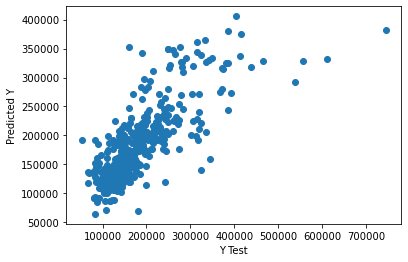

In [31]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [32]:
r2=r2_score(y_test,y_test_pred)
r2

0.5976274550305378

In [33]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE: 33795.88257313619
MSE: 2731703763.8762083
RMSE: 52265.703514601315


/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


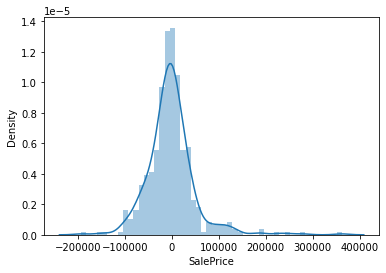

In [34]:
import seaborn as sns
sns.distplot((y_test-y_test_pred),bins=50);

In [35]:
####count encoding/frequency encoding using feature engine

In [46]:

from feature_engine.encoding import CountFrequencyEncoder

In [56]:
count_enc = CountFrequencyEncoder(
    encoding_method='count', # to do frequency ==> encoding_method='frequency'
    variables=['MSZoning','Street','LotShape','Neighborhood', 'Exterior1st', 'Exterior2nd'])

X_train_ce=count_enc.fit_transform(X_train)

In [57]:
X_test_ce=count_enc.transform(X_test)

In [58]:
X_train_ce.shape,X_test_ce.shape

((1022, 9), (438, 9))

In [59]:
X_train_ce.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,Neighborhood,Exterior1st,Exterior2nd
64,60,819,70.049958,9375,1017,642,105,364,353
682,120,819,70.049958,2887,1017,642,24,148,142
960,20,819,50.000000,7207,1017,345,41,148,112
1384,50,819,60.000000,9060,1017,642,71,21,29
1100,30,819,60.000000,8400,1017,642,18,148,142


In [ ]:
###standarsisation

In [60]:



scaler = StandardScaler()


scaler.fit(X_train_ce)

# transform train and test sets
X_train_ce= scaler.transform(X_train_ce)
X_test_ce = scaler.transform(X_test_ce)

In [61]:
lm2=LinearRegression()
lm2.fit(X_train_ce,y_train)

LinearRegression()

In [62]:
y_test_pred=lm2.predict(X_test_ce)

In [63]:
r2=r2_score(y_test,y_test_pred)
r2

0.2698376490655807

In [64]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE: 46614.385319270004
MSE: 4957065951.007249
RMSE: 70406.43401712125
